# Modelisation avec unsupervised learning

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score


In [2]:
df_ = pd.read_csv('grouped_RFM.csv').drop(columns='Unnamed: 0')

In [125]:
df_.head(3)

,derniere_date_cmd,nbre_cmd_diff,nbre_jour_apres_der_cmd,price
0,2018-05-10 10:56:27,1,111,129.9
1,2018-05-07 11:11:27,1,114,18.9
2,2017-03-10 21:05:03,1,537,69.0


In [3]:
df_ = df_.sort_values(by='nbre_jour_apres_der_cmd', ascending = False).reset_index().drop(columns='index')

In [127]:
df_.head(3)

,derniere_date_cmd,nbre_cmd_diff,nbre_jour_apres_der_cmd,price
0,2016-09-04 21:15:19,1,724,39.99
1,2016-09-05 00:15:34,1,723,59.50
2,2016-10-02 22:07:52,1,696,100.00


# CLUSTERING :

In [4]:
df = df_.drop(columns='derniere_date_cmd')


#### Standardisons nos données

In [93]:
#df = StandardScaler().fit_transform(df)

## 1 - KMEANS

### CHOIX DU NOMBRE DE CLUSTERS

#### LA METHODE DU COEFFICIENT DE SILHOUETTE

In [130]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k) # **kmeans_kwargs
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)



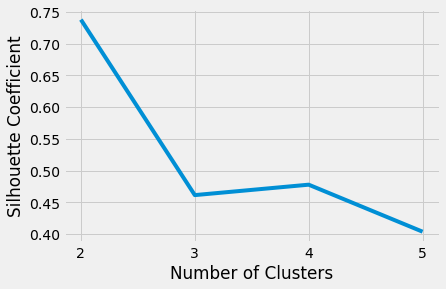

In [131]:

# Visualisation
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [132]:
Kmeans = KMeans(n_clusters=2)
Kmeans.fit(df)

KMeans(n_clusters=2)

In [133]:

kmeans_silhouette = silhouette_score(df, Kmeans.labels_).round(2)


In [135]:
kmeans_silhouette

0.74

### 2 - DBSCAN

In [103]:
# recherche du meilleur eps pour DBSCAN

def dict_best_eps(list_eps, df):    
    dic = {}
    for eps in list_eps:
        dic[eps] = silhouette_score(df, DBSCAN(eps=eps).fit(df).labels_).round(2)

    return [(k, dic[k]) for k in dic.keys() if max(dic.values()) == dic[k]]


In [ ]:
bes_eps = dict_best_eps([34, 35, 36], df)

In [32]:
bes_eps

[(34, 0.62), (35, 0.62)]

In [115]:
df[:2]

array([[-0.16104597,  3.14236146, -0.45196532],
       [-0.16104597,  3.13585311, -0.3509682 ]])

In [7]:
DBSCAN_ = DBSCAN(eps=34)
DBSCAN_.fit(df)

DBSCAN(eps=34)

In [8]:
dbscan_silhouette = silhouette_score(df, DBSCAN_.labels_).round(2)

In [9]:
dbscan_silhouette

0.43

### KMEANS remporte largement sur DBSCAN dans notre problème de clustering

## interprétation des clusters obtenus destinée aux équipes métiers (marketing)

In [138]:
df['cluster'] = Kmeans.labels_

In [139]:
df['cluster'].unique()

array([1, 0])

In [140]:
df[df['cluster']==0].shape

(2943, 4)

In [141]:
df[df['cluster']==1].shape

(92476, 4)

On a environ 90% ou plus des nos données dans le 2ème cluster, ce qui n'est pas très intéressant.

Nous allons donc prendre le 2eme nbre de cluster optimal à savoir 4

In [5]:
Kmeans = KMeans(n_clusters=4)
Kmeans.fit(df)

KMeans(n_clusters=4)

In [143]:
df['cluster'] = Kmeans.labels_

In [144]:
df['cluster'].unique()

array([0, 2, 3, 1])

In [145]:
df[df['cluster']==0].shape, df[df['cluster']==1].shape

((38453, 4), (51425, 4))

In [146]:
df[df['cluster']==2].shape, df[df['cluster']==3].shape

((4880, 4), (661, 4))

In [148]:
df[df['cluster']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nbre_cmd_diff,38453.0,1.050789,0.269163,1.00,1.0,1.0,1.0,16.00
nbre_jour_apres_der_cmd,38453.0,391.139443,96.065847,259.00,304.0,379.0,465.0,724.00
price,38453.0,93.282392,70.918278,2.29,39.9,70.0,127.0,399.99
cluster,38453.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00


Dans notre 1er cluster, on a les clients qui :

    - ont commandé entre 1 et 16 fois
    - la dernière fois qu'il ont commandé remonte de 259 à 724 jours soit une moyenne de 391 jours
    - le prix de leurs dernières commandes est comprise entre 2.29 et 399.99 UM soit un prix moyen de 93.28

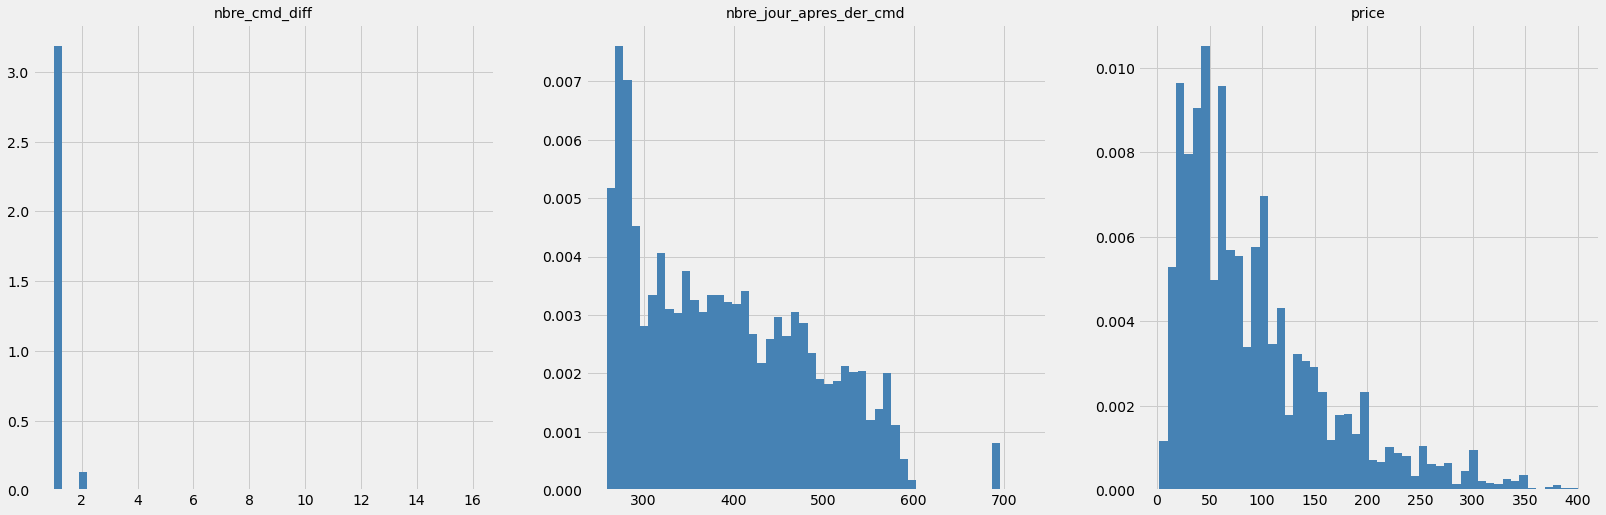

In [166]:
fig = plt.figure(figsize=(25, 8))
for feat_idx in range(df[df['cluster']==0].drop(columns='cluster').values.shape[1]):
    ax = fig.add_subplot(1,3, (feat_idx+1))
    h = ax.hist(df[df['cluster']==0].drop(columns='cluster').values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df[df['cluster']==0].drop(columns='cluster').columns[feat_idx], fontsize=14)

In [149]:
df[df['cluster']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nbre_cmd_diff,51425.0,1.022810,0.159744,1.00,1.00,1.0,1.00,5.0
nbre_jour_apres_der_cmd,51425.0,129.707555,73.127899,0.00,66.00,132.0,191.00,260.0
price,51425.0,91.875868,66.600206,0.85,39.99,74.9,125.99,359.9
cluster,51425.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.0


Dans notre 2eme cluster, on a les clients qui :
    
    - ont commandé entre 1 et 5 fois
    - la dernière fois qu'il ont commandé remonte de 0 à 260 jours soit une moyenne de 129 jours
    - le prix de leurs dernières commandes est comprise entre 0.85 et 359.9 UM soit un prix moyen de 91.87

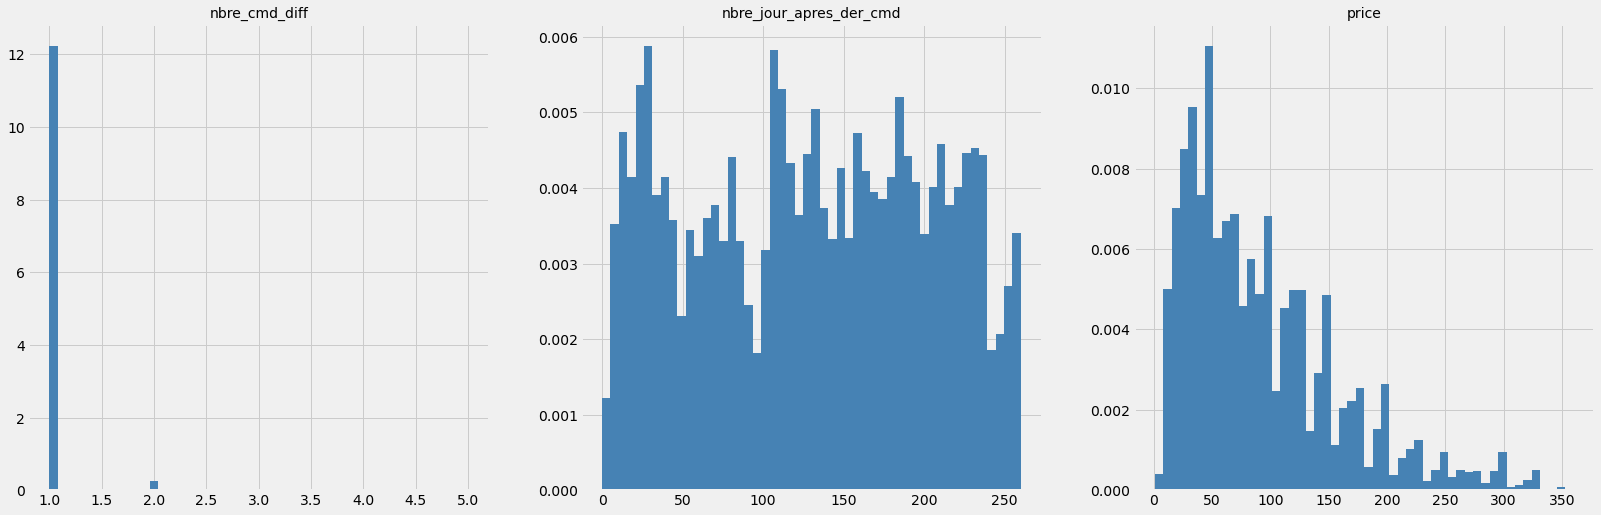

In [165]:
fig = plt.figure(figsize=(25, 8))
for feat_idx in range(df[df['cluster']==1].drop(columns='cluster').values.shape[1]):
    ax = fig.add_subplot(1,3, (feat_idx+1))
    h = ax.hist(df[df['cluster']==1].drop(columns='cluster').values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df[df['cluster']==1].drop(columns='cluster').columns[feat_idx], fontsize=14)

In [150]:
df[df['cluster']==2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nbre_cmd_diff,4880.0,1.022746,0.164779,1.0,1.0,1.00,1.0000,4.00
nbre_jour_apres_der_cmd,4880.0,233.185861,143.548844,1.0,120.0,216.00,323.0000,694.00
price,4880.0,554.488678,196.090300,309.0,390.0,499.99,669.1625,1129.99
cluster,4880.0,2.000000,0.000000,2.0,2.0,2.00,2.0000,2.00


Dans notre 3eme cluster, on a les clients qui :
    
    - ont commandé entre 1 et 4 fois
    - la dernière fois qu'il ont commandé remonte de 1 à 694 jours soit une moyenne de 233 jours
    - le prix de leurs dernières commandes est comprise entre 309 et 1129.99 UM soit un prix moyen de 554.49

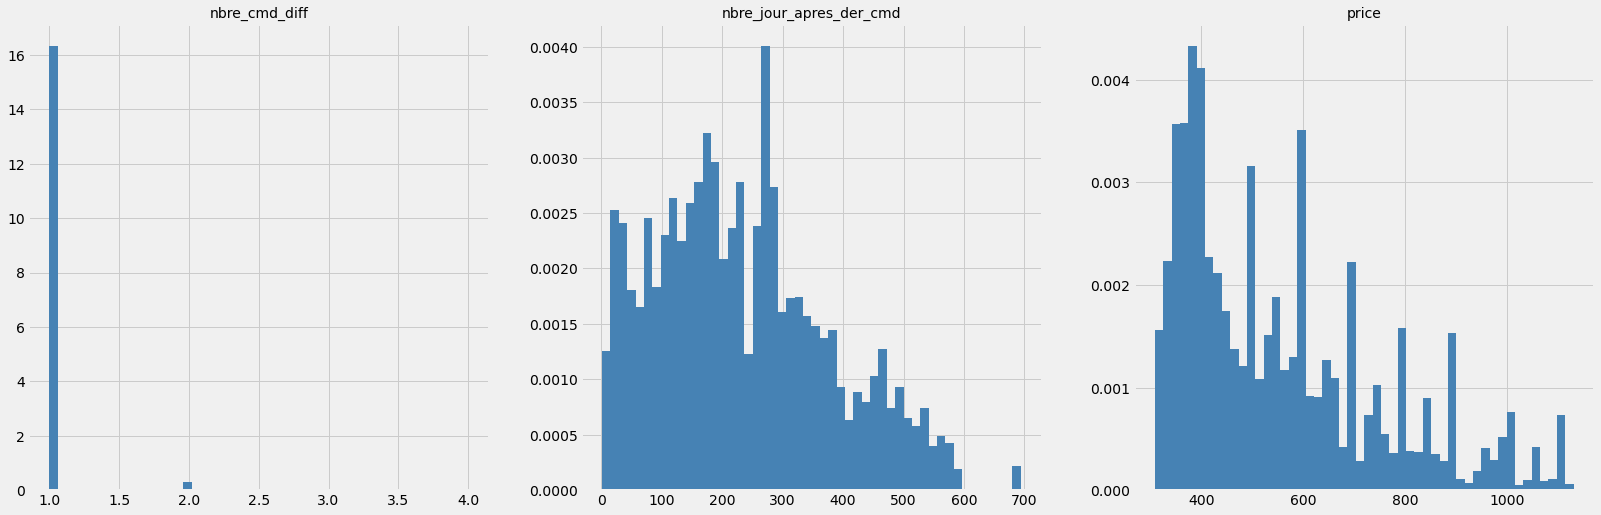

In [164]:
fig = plt.figure(figsize=(25, 8))
for feat_idx in range(df[df['cluster']==2].drop(columns='cluster').values.shape[1]):
    ax = fig.add_subplot(1,3, (feat_idx+1))
    h = ax.hist(df[df['cluster']==2].drop(columns='cluster').values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df[df['cluster']==2].drop(columns='cluster').columns[feat_idx], fontsize=14)

In [151]:
df[df['cluster']==3].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nbre_cmd_diff,661.0,1.013616,0.115977,1.00,1.0,1.0,1.0,2.0
nbre_jour_apres_der_cmd,661.0,248.868381,165.885948,3.00,105.0,231.0,364.0,693.0
price,661.0,1708.057988,674.527331,1129.34,1299.0,1499.0,1934.0,6735.0
cluster,661.0,3.000000,0.000000,3.00,3.0,3.0,3.0,3.0


Dans notre 4eme cluster, on a les clients qui :
    
    - ont commandé entre 1 et 2 fois
    - la dernière fois qu'il ont commandé remonte de 3 à 693 jours soit une moyenne de 249 jours
    - le prix de leurs dernières commandes est comprise entre 1129.34 et 6735 UM soit un prix moyen de 1708

In [156]:
import matplotlib.pyplot as plt

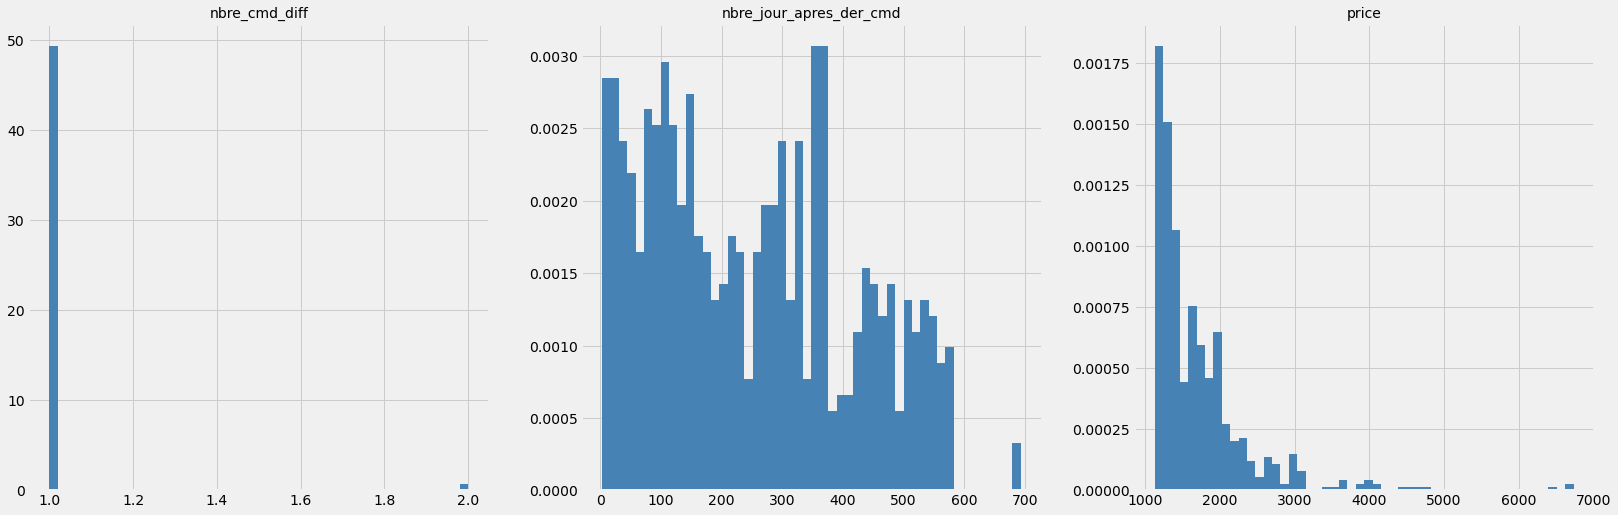

In [163]:
fig = plt.figure(figsize=(25, 8))
for feat_idx in range(df[df['cluster']==3].drop(columns='cluster').values.shape[1]):
    ax = fig.add_subplot(1,3, (feat_idx+1))
    h = ax.hist(df[df['cluster']==3].drop(columns='cluster').values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df[df['cluster']==3].drop(columns='cluster').columns[feat_idx], fontsize=14)

# EVALUATION DE LA STABILITE DES CLUSTERS DANS LE TEMPS

## 1 -  EVALUATION DE LA STABILITE DES CLUSTERS DURANT LES SIX PREMIERS MOIS 

In [10]:
df_[df_['nbre_jour_apres_der_cmd'] >= 724 - 180].shape

(2994, 4)

In [12]:
#Entranons notre modèle avec les données des 6 premiers mois 
#et vérifions de nouveau le nombre de cluster et le coef de silhouette

df = df_[df_['nbre_jour_apres_der_cmd'] >= 724 - 180].drop(columns=['derniere_date_cmd'])


kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(df)
print("Coef Silh KMEANS : ", silhouette_score(df, kmeans1.labels_).round(2))


DBSCAN1 = DBSCAN(eps=34)
DBSCAN1.fit(df)
print("\nCoef Silh DBSCAN : ", silhouette_score(df, DBSCAN1.labels_).round(2))


#print("\nARI KMEAN2 : ", round(adjusted_rand_score(kmeans2.labels_, kmeans3.labels_[:len(kmeans2.labels_)]), 2))

#print("\nARI DBSCAN2 : ", round(adjusted_rand_score(DBScan2.labels_, DBSCAN3.labels_[:len(DBScan2.labels_)]), 2))

Coef Silh KMEANS :  0.72

Coef Silh DBSCAN :  0.36


## EVALUATION DE LA STABILITE DES CLUSTERS DURANT LES 12 PREMIERS MOIS 

In [13]:
df = df_[df_['nbre_jour_apres_der_cmd'] >= 724 - 365].drop(columns=['derniere_date_cmd'])


kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(df)
print("Coef Silh KMEANS : ", silhouette_score(df, kmeans2.labels_).round(2))


DBSCAN2 = DBSCAN(eps=34)
DBSCAN2.fit(df)
print("\nCoef Silh DBSCAN : ", silhouette_score(df, DBSCAN2.labels_).round(2))


print("\nARI KMEAN2 : ", round(adjusted_rand_score(kmeans1.labels_, kmeans2.labels_[:len(kmeans1.labels_)]), 2))

print("\nARI DBSCAN2 : ", round(adjusted_rand_score(DBSCAN1.labels_, DBSCAN2.labels_[:len(DBSCAN1.labels_)]), 2))

Coef Silh KMEANS :  0.48

Coef Silh DBSCAN :  0.42

ARI KMEAN2 :  0.5

ARI DBSCAN2 :  0.98


## EVALUATION DE LA STABILITE DES CLUSTERS DURANT LES 18 PREMIERS MOIS 

In [14]:
df = df_[df_['nbre_jour_apres_der_cmd'] >= 724 - 545].drop(columns=['derniere_date_cmd'])


kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(df)
print("Coef Silh KMEANS : ", silhouette_score(df, kmeans3.labels_).round(2))


DBSCAN3 = DBSCAN(eps=34)
DBSCAN3.fit(df)
print("\nCoef Silh DBSCAN : ", silhouette_score(df, DBSCAN3.labels_).round(2))


print("\nARI KMEAN2 : ", round(adjusted_rand_score(kmeans2.labels_, kmeans3.labels_[:len(kmeans2.labels_)]), 2))

print("\nARI DBSCAN2 : ", round(adjusted_rand_score(DBSCAN2.labels_, DBSCAN3.labels_[:len(DBSCAN2.labels_)]), 2))

Coef Silh KMEANS :  0.48

Coef Silh DBSCAN :  0.43

ARI KMEAN2 :  0.38

ARI DBSCAN2 :  0.96


## EVALUATION DE LA STABILITE DES CLUSTERS DURANT LES 24 PREMIERS MOIS

In [15]:
df = df_.drop(columns=['derniere_date_cmd'])


kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(df)
print("Coef Silh KMEANS : ", silhouette_score(df, kmeans4.labels_).round(2))


DBSCAN4 = DBSCAN(eps=34)
DBSCAN4.fit(df)
print("\nCoef Silh DBSCAN : ", silhouette_score(df, DBSCAN4.labels_).round(2))


print("\nARI KMEAN4 : ", round(adjusted_rand_score(kmeans3.labels_, kmeans4.labels_[:len(kmeans3.labels_)]), 2))

print("\nARI DBSCAN4 : ", round(adjusted_rand_score(DBSCAN3.labels_, DBSCAN4.labels_[:len(DBSCAN3.labels_)]), 2))

Coef Silh KMEANS :  0.48

Coef Silh DBSCAN :  0.43

ARI KMEAN4 :  0.22

ARI DBSCAN4 :  0.97
